In [25]:
import pandas as ds
import numpy as nm
import matplotlib.pyplot as lib
import seaborn as sns
%matplotlib inline

In [26]:
da=ds.read_csv('Classified Data',index_col=0)

In [27]:
da.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


PREPROCESSING THE DATA

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler=StandardScaler()

In [30]:
scaler.fit(da.drop('TARGET CLASS',axis=1))      #Removing the 'TARGET CLASS' column

StandardScaler()

In [31]:
scaled=scaler.transform(da.drop('TARGET CLASS',axis=1))  #Scaling and Transforming the Dataset to Standard Format

In [32]:
scaled

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

Creating the Data Frame of the dataset 

In [37]:
scaledd=ds.DataFrame(scaled,columns=da.columns[:-1])

In [39]:
scaledd.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [40]:
da.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [41]:
da.columns[:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X=scaledd
y=da['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn=KNeighborsClassifier(n_neighbors=1)

In [51]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [53]:
X_train

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
703,1.741762,-1.544911,0.219819,0.372042,-0.552159,-0.581842,0.765168,-0.909920,1.693054,-0.181650
311,-0.253575,1.867009,0.393787,-0.872150,0.129042,-0.348117,0.443513,0.885854,0.108135,0.336401
722,-1.080970,0.427936,0.038017,-0.951017,-1.149811,0.235974,-0.835427,-1.120490,0.867817,0.112991
629,0.268749,-1.082794,-0.650835,0.779415,-2.290312,-1.486998,-0.740214,0.798178,0.218989,0.232603
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
...,...,...,...,...,...,...,...,...,...,...
106,-1.978598,0.475777,-0.422636,-1.134506,-0.406097,1.351978,-0.621618,-0.241688,-0.869905,-1.996312
270,0.220902,0.689820,-0.343130,-0.679380,-0.874421,-1.057533,0.706221,-0.509378,1.124947,0.495153
860,-1.025521,1.241777,0.358562,0.220358,1.838459,-0.103198,0.325037,0.132569,-1.510792,0.832863
435,0.888357,0.802441,-0.802459,0.036219,-0.411028,-1.040641,-1.206336,0.071199,-1.351282,0.933751


In [54]:
y_train

703    1
311    0
722    1
629    1
0      1
      ..
106    0
270    1
860    0
435    1
102    1
Name: TARGET CLASS, Length: 670, dtype: int64

In [55]:
X_test

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
521,-0.840720,1.583438,1.018093,-1.214048,-0.557318,-0.108117,0.418539,0.495338,-0.407867,0.406975
737,1.381655,0.412642,-0.440155,0.576212,-1.489652,-1.060713,-0.849707,-1.839249,0.932394,-0.928714
740,1.268502,0.133668,0.717822,0.957695,-0.361608,0.645475,-2.549821,-0.904516,-0.422002,1.089682
660,0.911948,-0.433407,-1.315355,1.037253,-0.943751,-1.081542,-1.807654,0.573993,0.310824,-0.010354
411,-0.017284,0.739700,0.321345,-0.096414,-0.245185,0.692505,0.511209,-0.206656,-0.184316,2.460944
...,...,...,...,...,...,...,...,...,...,...
506,1.527228,0.351409,-0.594208,-0.294356,0.532733,0.142463,-1.008286,-0.452064,1.557091,-2.828660
342,-0.816886,-1.494791,-0.711867,-0.100880,-0.853004,-1.020837,0.517168,0.446645,0.906404,0.562439
485,-0.950710,0.342405,0.057680,-0.307822,-2.197955,-1.463419,-0.074418,0.092651,-0.056869,0.461528
711,-0.441935,1.079612,1.719171,0.615080,-0.400413,0.515423,-0.739730,1.195610,-2.188843,0.424044


In [56]:
y_test

521    0
737    1
740    1
660    1
411    0
      ..
506    1
342    1
485    0
711    0
133    1
Name: TARGET CLASS, Length: 330, dtype: int64

In [49]:
redi=knn.predict(X_test)

In [57]:
redi

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,

In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
print(confusion_matrix(y_test,redi))

[[146   9]
 [ 11 164]]


In [76]:
print(classification_report(y_test,redi))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       155
           1       0.95      0.94      0.94       175

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330



In [77]:
errorrate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    redii=knn.predict(X_test)
    errorrate.append(nm.mean(redii!=y_test))
    

In [78]:
errorrate

[0.06060606060606061,
 0.08181818181818182,
 0.05454545454545454,
 0.05757575757575758,
 0.048484848484848485,
 0.05454545454545454,
 0.05757575757575758,
 0.051515151515151514,
 0.048484848484848485,
 0.048484848484848485,
 0.051515151515151514,
 0.045454545454545456,
 0.048484848484848485,
 0.048484848484848485,
 0.051515151515151514,
 0.051515151515151514,
 0.05454545454545454,
 0.048484848484848485,
 0.05454545454545454,
 0.051515151515151514,
 0.05454545454545454,
 0.05757575757575758,
 0.06060606060606061,
 0.05454545454545454,
 0.05757575757575758,
 0.05454545454545454,
 0.051515151515151514,
 0.051515151515151514,
 0.048484848484848485,
 0.045454545454545456,
 0.048484848484848485,
 0.045454545454545456,
 0.048484848484848485,
 0.048484848484848485,
 0.048484848484848485,
 0.048484848484848485,
 0.048484848484848485,
 0.051515151515151514,
 0.051515151515151514]

Text(0, 0.5, 'Error Rate')

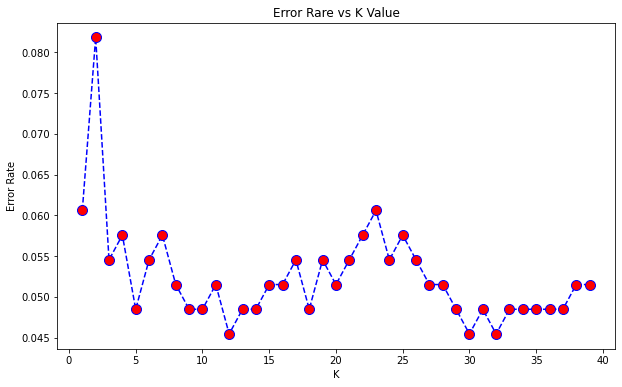

In [79]:
lib.figure(figsize=(10,6))
lib.plot(range(1,40),errorrate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
lib.title('Error Rare vs K Value')
lib.xlabel('K')
lib.ylabel('Error Rate')

In [81]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
redic=knn.predict(X_test)
print(confusion_matrix(y_test,redi))
print('\n')
print(classification_report(y_test,redi))


[[146   9]
 [ 11 164]]


              precision    recall  f1-score   support

           0       0.93      0.94      0.94       155
           1       0.95      0.94      0.94       175

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330

